In [1]:
import os
import sys
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

directory = os.getcwd().split(os.path.sep)
root_index = directory.index("Group_ID_20_Part_1")
root_path = os.path.sep.join(directory[:root_index+1])

sys.path.append(root_path)
pd.set_option('display.max_columns', None)

In [2]:
crashes_path = os.path.join(root_path, "data", "raw", "Crashes.csv")
crashes = pd.read_csv(crashes_path)

people_path = os.path.join(root_path, "data", "raw", "People.csv")
people = pd.read_csv(people_path)

vehicles_path = os.path.join(root_path, "data", "raw", "Vehicles.csv")
vehicles = pd.read_csv(vehicles_path)

### Crashes

In [3]:
crashes

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC113649,01/12/2019 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,01/12/2019 12:01:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,734,N,CENTRAL PARK AVE,1112.0,6.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,7,1,41.894718,-87.716439,POINT (-87.716439109795 41.894718028422)
1,JC113627,01/11/2019 11:36:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,01/11/2019 11:42:00 PM,UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...,DISREGARDING STOP SIGN,4432,N,LARAMIE AVE,1623.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,6,1,41.961558,-87.757564,POINT (-87.757564024038 41.961557797444)
2,JC113637,01/11/2019 11:31:00 PM,20,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DARKNESS,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,01/12/2019 12:08:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,5600,S,LAWNDALE AVE,822.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,6,1,41.791460,-87.715908,POINT (-87.715907858157 41.791459913725)
3,JC113630,01/11/2019 11:22:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,01/11/2019 11:48:00 PM,IMPROPER LANE USAGE,NOT APPLICABLE,4633,W,JACKSON BLVD,1131.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,6,1,41.876779,-87.741695,POINT (-87.741694507685 41.876778736117)
4,JC113604,01/11/2019 11:08:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,01/11/2019 11:38:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,4438,W,MONTROSE AVE,1722.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,23,6,1,41.960921,-87.739893,POINT (-87.739893056441 41.960920858153)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257920,HY498942,11/11/2014 08:00:00 PM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,11/12/2015 02:40:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1298,W,DEVON AVE,2432.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20,3,11,41.998270,-87.662997,POINT (-87.662996825424 41.998269693725)
257921,HZ400518,08/20/2014 04:50:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,08/20/2016 08:32:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,713,E,79TH ST,624.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,16,4,8,41.751143,-87.607091,POINT (-87.607090627909 41.751143217534)
257922,HZ164689,02/24/2014 07:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,02/25/2016 02:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,199,N,SACRAMENTO BLVD,1222.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0

In [4]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257925 entries, 0 to 257924
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   RD_NO                          257925 non-null  object 
 1   CRASH_DATE                     257925 non-null  object 
 2   POSTED_SPEED_LIMIT             257925 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         257925 non-null  object 
 4   DEVICE_CONDITION               257925 non-null  object 
 5   WEATHER_CONDITION              257925 non-null  object 
 6   LIGHTING_CONDITION             257925 non-null  object 
 7   FIRST_CRASH_TYPE               257925 non-null  object 
 8   TRAFFICWAY_TYPE                257925 non-null  object 
 9   ALIGNMENT                      257925 non-null  object 
 10  ROADWAY_SURFACE_COND           257925 non-null  object 
 11  ROAD_DEFECT                    257925 non-null  object 
 12  REPORT_TYPE                   

In [5]:
crashes.describe()

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,257925.000000,257925.000000,257921.000000,257925.000000,257925.000000,257925.000000,257925.000000,257925.000000,257925.000000,257925.000000,257925.0,257925.000000,257925.000000,257925.0000,256903.000000,256903.000000
mean,29.081760,3573.144879,1242.046662,2.022797,0.153463,0.000888,0.016861,0.082249,0.053465,2.033083,0.0,13.205533,4.123672,7.1003,41.860618,-87.677238
std,4.176187,2948.210235,713.282194,0.400398,0.505677,0.032641,0.151624,0.365792,0.295557,1.160398,0.0,5.417016,1.962760,3.4558,0.084708,0.057564
min,20.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.0000,41.644670,-87.925036
25%,30.000000,1158.000000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.0000,41.786976,-87.719488
50%,30.000000,3100.000000,1214.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,8.0000,41.878039,-87.671287
75%,30.000000,5501.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.0000,41.924490,-87.632427
max,70.000000,451100.000000,2535.000000,18.000000,21.000000,3.000000,7.000000,21.000000,10.000000,61.000000,0.0,23.000000,7.000000,12.0000,42.022780,-87.524589


In [6]:
missing_crashes = crashes.isnull().mean() * 100
missing_crashes

RD_NO                            0.000000
CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      1.936997
CRASH_TYPE                       0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0.000000
STREET_NO                        0.000000
STREET_DIRECTION                 0.000775
STREET_NAME                      0.000388
BEAT_OF_OCCURRENCE               0.001551
NUM_UNITS                        0.000000
MOST_SEVERE_INJURY               0.002714
INJURIES_TOTAL                   0

In [7]:
for column_name, values in crashes.items(): 
    for value in values: 
        if isinstance(value, str) and re.search(r'[,;]', value): 
            print(f"Colonna '{column_name}', valore: '{value}'")
            break 

Colonna 'LIGHTING_CONDITION', valore: 'DARKNESS, LIGHTED ROAD'
Colonna 'ALIGNMENT', valore: 'CURVE, LEVEL'
Colonna 'ROADWAY_SURFACE_COND', valore: 'SAND, MUD, DIRT'
Colonna 'ROAD_DEFECT', valore: 'RUT, HOLES'
Colonna 'PRIM_CONTRIBUTORY_CAUSE', valore: 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER'
Colonna 'SEC_CONTRIBUTORY_CAUSE', valore: 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
Colonna 'MOST_SEVERE_INJURY', valore: 'REPORTED, NOT EVIDENT'


In [8]:
for column_name, values in crashes.items():
    for value in values:
        if isinstance(value, str) and re.search(r"\(", value):
            print(f"Colonna '{column_name}', valore: '{value}'")
            break 

Colonna 'TRAFFICWAY_TYPE', valore: 'DIVIDED - W/MEDIAN (NOT RAISED)'
Colonna 'REPORT_TYPE', valore: 'NOT ON SCENE (DESK REPORT)'
Colonna 'PRIM_CONTRIBUTORY_CAUSE', valore: 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)'
Colonna 'SEC_CONTRIBUTORY_CAUSE', valore: 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
Colonna 'LOCATION', valore: 'POINT (-87.716439109795 41.894718028422)'


In [9]:
duplicated_crashes = crashes.duplicated().sum()
duplicated_crashes

0

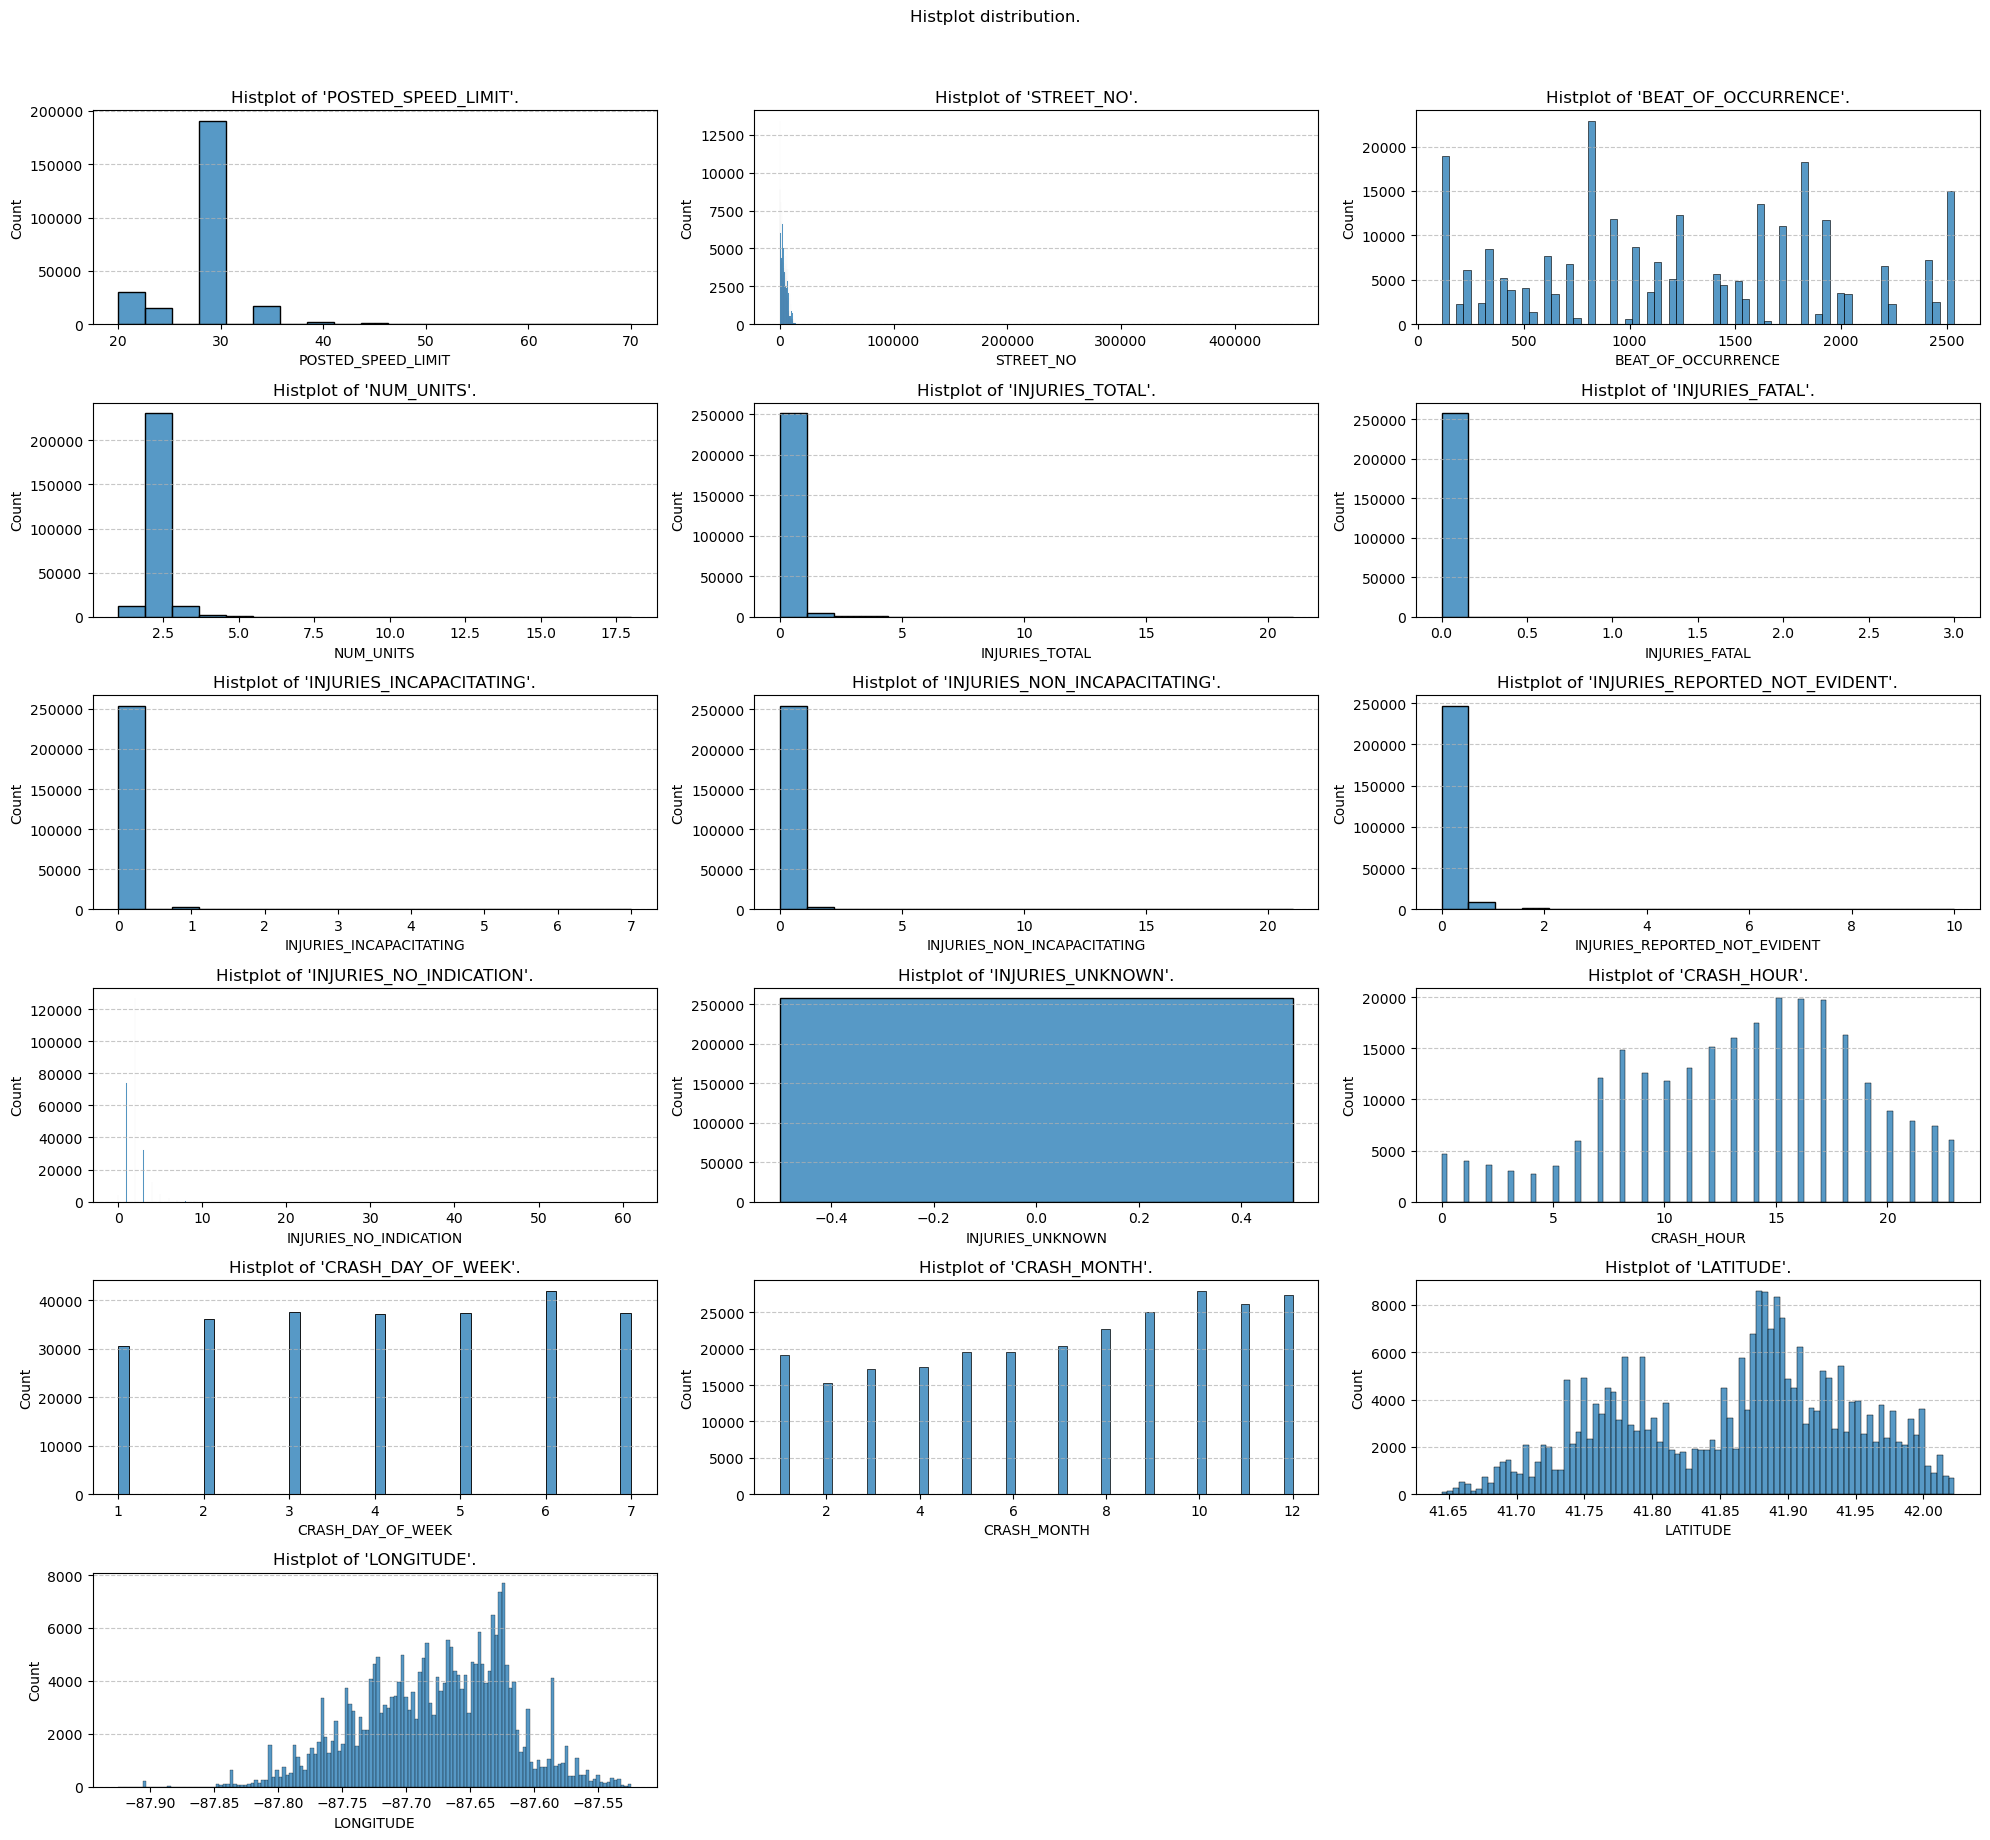

In [10]:
numerical_features_crashes = list(crashes.select_dtypes(include=['int64', 'float64']).columns)

ncols = 3
nrows = -(-len(numerical_features_crashes) // ncols)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows*ncols))

for i, column in enumerate(numerical_features_crashes):
    row = i // ncols
    col = i % ncols
    sns.histplot(data=crashes, x=column, multiple='dodge', ax=ax[row, col])
    ax[row, col].set_title(f"Histplot of '{column}'.")
    ax[row, col].grid(axis='y', linestyle='--', alpha=.7)

for i in range(len(numerical_features_crashes), nrows*ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(ax[row, col])

plt.suptitle("Histplot distribution.", y=1.02)
plt.tight_layout()
plt.show()

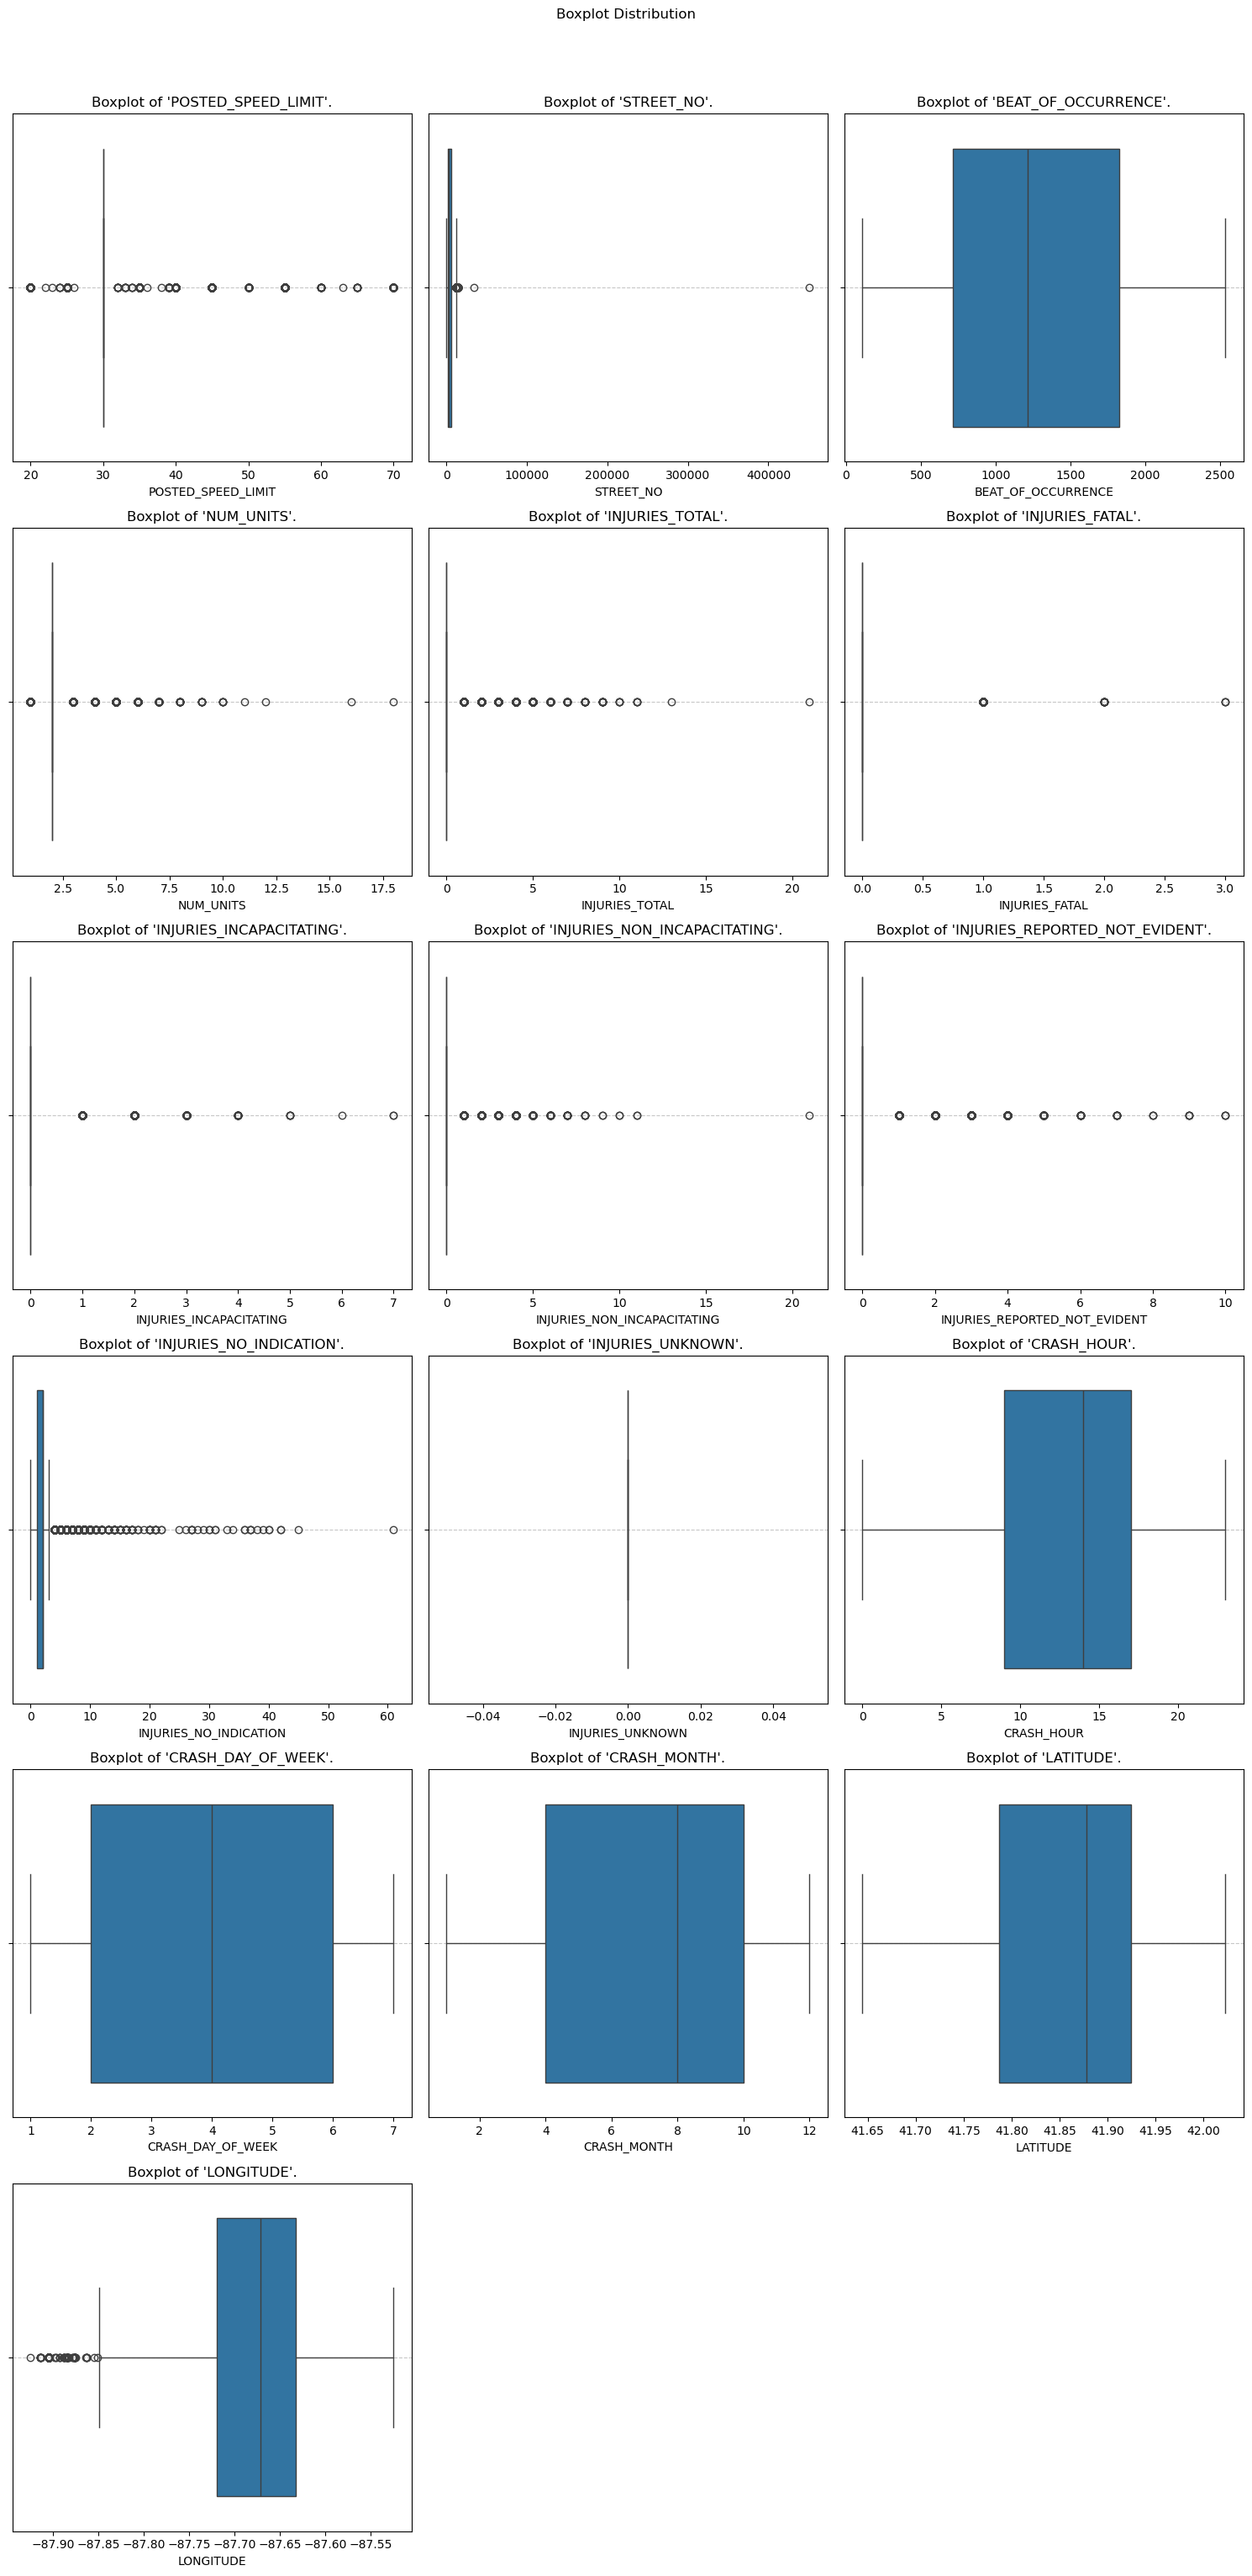

In [11]:
ncols = 3
nrows = -(-len(numerical_features_crashes) // ncols)  

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
ax = ax.reshape(nrows, ncols) 

for i, column in enumerate(numerical_features_crashes):
    row = i // ncols
    col = i % ncols
    sns.boxplot(x=crashes[column], ax=ax[row, col])
    ax[row, col].set_title(f"Boxplot of '{column}'.")
    ax[row, col].grid(axis='y', linestyle='--', alpha=.7)

for i in range(len(numerical_features_crashes), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(ax[row, col])

plt.suptitle("Boxplot Distribution", y=1.02)
plt.tight_layout()
plt.show()

Escluse per varianza nulla: ['INJURIES_UNKNOWN']


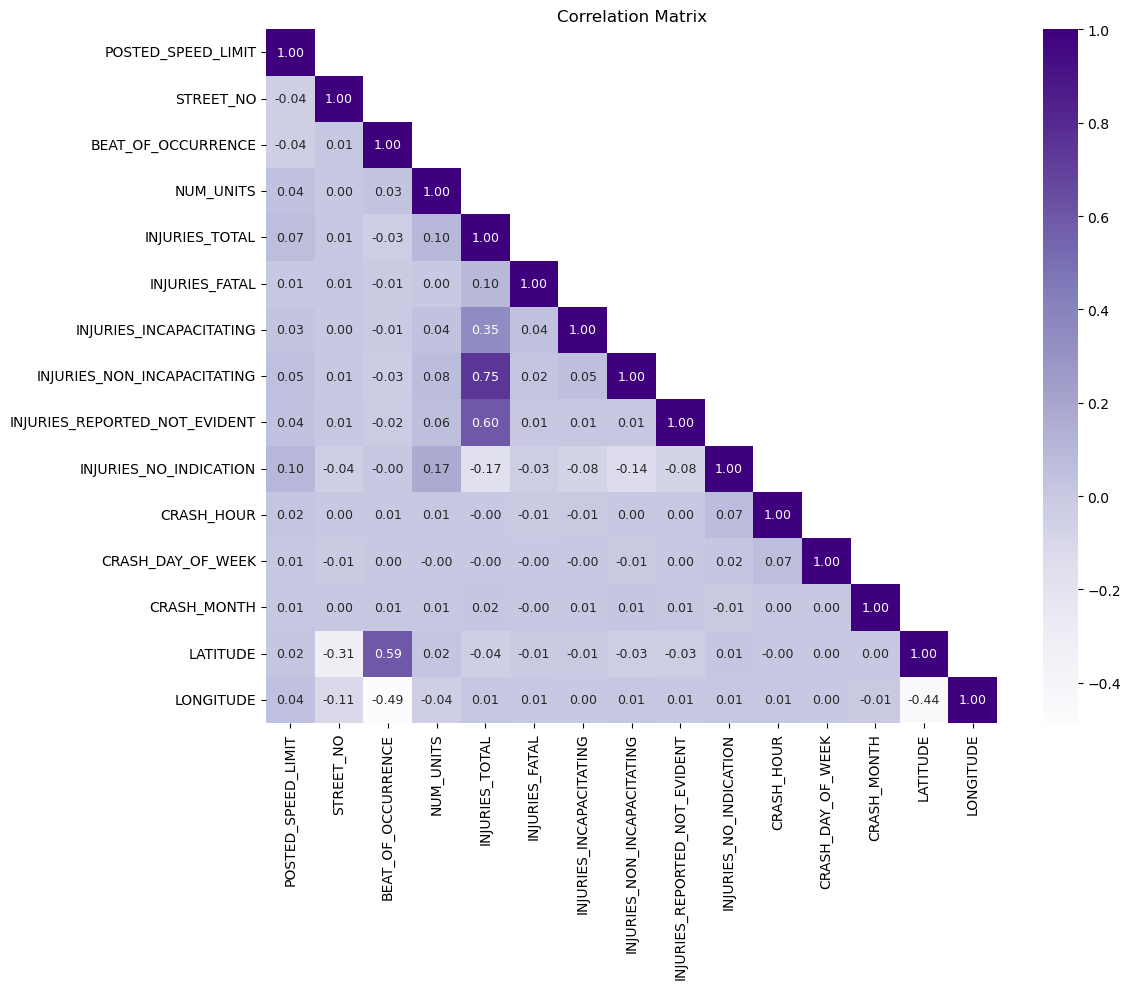

In [12]:
low_variance_features_crashes = [col for col in numerical_features_crashes if crashes[col].var() == 0]
if low_variance_features_crashes:
    print(f"Escluse per varianza nulla: {low_variance_features_crashes}")
    correlation_features_crashes = [col for col in numerical_features_crashes if col not in low_variance_features_crashes]

correlation_matrix_crashes = crashes[correlation_features_crashes].corr(method='pearson')

mask = np.triu(np.ones_like(correlation_matrix_crashes, dtype=bool), k=1)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_crashes, annot=True, cmap='Purples', fmt='.2f', mask=mask, annot_kws={'size': 9})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


### People

In [13]:
people

,PERSON_ID,PERSON_TYPE,RD_NO,VEHICLE_ID,CRASH_DATE,CITY,STATE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,DAMAGE_CATEGORY,DAMAGE
0,O561555,DRIVER,JC113649,535742.0,01/12/2019 12:01:00 AM,NaN,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED,"OVER $1,500",6069.089569
1,O561563,DRIVER,JC113627,535738.0,01/11/2019 11:36:00 PM,CHICAGO,IL,M,63.0,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"OVER $1,500",6237.638447
2,O561564,DRIVER,JC113627,535741.0,01/11/2019 11:36:00 PM,CHICAGO,IL,M,36.0,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,DISREGARDED CONTROL DEVICES,NOT OBSCURED,IMPAIRED - ALCOHOL,"TEST PERFORMED, RESULTS UNKNOWN","OVER $1,500",3802.304187
3,O561540,DRIVER,JC113637,535714.0,01/11/2019 11:31:00 PM,NaN,NaN,F,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NONE,UNKNOWN,UNKNOWN,TEST NOT OFFERED,"OVER $1,500",3127.680131
4,O561541,DRIVER,JC113637,535718.0,01/11/2019 11:31:00 PM,CHICAGO,IL,F,31.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"OVER $1,500",2225.886815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564560,O30751,DRIVER,HZ164689,29701.0,02/24/2014 07:45:00 PM,CHICAGO,IL,M,33.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"$501 - $1,500",1436.117669
564561,O24495,DRIVER,HZ122950,23633.0,01/21/2014 07:40:00 AM,CHICAGO,IL,F,36.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,FAILED TO YIELD,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"OVER $1,500",2713.810276
564562,O24496,DRIVER,HZ122950,23634.0,01/21/2014 07:40:00 AM,CHICAGO,IL,F,41.0,SAFETY BELT USED,"DEPLOYED, FRONT",NONE,NONINCAPACITATING INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"OVER $1,500",8248.141026
564563,O481321,DRIVER,JB442550,460655.0,01/18/2014 06:14:00 PM,NaN,NaN,M,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER PARKING,UNKNOWN,UNKNOWN,TEST NOT OFFERED,"OVER $1,500",1940.156103


In [14]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564565 entries, 0 to 564564
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              564565 non-null  object 
 1   PERSON_TYPE            564565 non-null  object 
 2   RD_NO                  564565 non-null  object 
 3   VEHICLE_ID             553869 non-null  float64
 4   CRASH_DATE             564565 non-null  object 
 5   CITY                   420645 non-null  object 
 6   STATE                  422589 non-null  object 
 7   SEX                    557411 non-null  object 
 8   AGE                    403584 non-null  float64
 9   SAFETY_EQUIPMENT       563155 non-null  object 
 10  AIRBAG_DEPLOYED        554113 non-null  object 
 11  EJECTION               557860 non-null  object 
 12  INJURY_CLASSIFICATION  564269 non-null  object 
 13  DRIVER_ACTION          454799 non-null  object 
 14  DRIVER_VISION          454681 non-nu

In [15]:
people.describe()

,VEHICLE_ID,AGE,DAMAGE
count,553869.000000,403584.000000,490256.000000
mean,268102.188790,38.048649,2892.687029
std,154346.905215,17.077384,2012.385529
min,2.000000,0.000000,501.002402
25%,136639.000000,26.000000,1197.915852
50%,268323.000000,36.000000,2400.340016
75%,401073.000000,50.000000,4122.020978
max,535742.000000,110.000000,15536.847301


In [16]:
missing_people = people.isnull().mean() * 100
missing_people

PERSON_ID                 0.000000
PERSON_TYPE               0.000000
RD_NO                     0.000000
VEHICLE_ID                1.894556
CRASH_DATE                0.000000
CITY                     25.492193
STATE                    25.147857
SEX                       1.267170
AGE                      28.514166
SAFETY_EQUIPMENT          0.249750
AIRBAG_DEPLOYED           1.851337
EJECTION                  1.187640
INJURY_CLASSIFICATION     0.052430
DRIVER_ACTION            19.442580
DRIVER_VISION            19.463481
PHYSICAL_CONDITION       19.395641
BAC_RESULT               19.277320
DAMAGE_CATEGORY           0.000000
DAMAGE                   13.162169
dtype: float64

In [17]:
for column_name, values in people.items(): 
    for value in values: 
        if isinstance(value, str) and re.search(r'[,;]', value): 
            print(f"Colonna '{column_name}', valore: '{value}'")
            break

Colonna 'CITY', valore: 'SAINT-THERESE (QUEBEC, CANADA)'
Colonna 'AIRBAG_DEPLOYED', valore: 'DEPLOYED, FRONT'
Colonna 'INJURY_CLASSIFICATION', valore: 'REPORTED, NOT EVIDENT'
Colonna 'DRIVER_VISION', valore: 'TREES, PLANTS'
Colonna 'BAC_RESULT', valore: 'TEST PERFORMED, RESULTS UNKNOWN'
Colonna 'DAMAGE_CATEGORY', valore: 'OVER $1,500'


In [18]:
for column_name, values in people.items(): 
    for value in values: 
        if isinstance(value, str) and re.search(r'[\(]', value): 
            print(f"Colonna '{column_name}', valore: '{value}'")
            break

Colonna 'CITY', valore: 'SAINT-THERESE (QUEBEC, CANADA)'
Colonna 'AIRBAG_DEPLOYED', valore: 'DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)'
Colonna 'DRIVER_VISION', valore: 'WINDSHIELD (WATER/ICE)'


In [19]:
duplicated_people = people.duplicated().sum()
duplicated_people

0

In [20]:
varianti_chicago = people[people["CITY"].str.contains(r'(?i)^c', na=False)]
print(varianti_chicago["CITY"].unique())

['CHICAGO' 'CICERO' 'CHCIAGO' 'CALUMET CITY' 'CREST HILL'
 'COUNTRY CLUB HILLS' 'CARPENTERSVILLE' 'CHIOCAGO' 'CHICAGO RIDGE'
 'CROWN POINT' 'CRETE' 'CHGO' 'CHI' 'CHICAGO HEIGHTS' 'CARMEL'
 'CALUMET PARK' 'COLORADO SPRINGS' 'CHICAO' 'CHIAGO' 'CEDAR GROVE'
 'CHICAG' 'CHICAG0' 'CHICAOG' 'COLFAX' 'CHIHCAGO' 'COUNTRY CLUB HILL'
 'CRYSTAL LAKE' 'CHCICAGO' 'CAROL STREAM' 'CINCINNATI' 'CHIACAGO'
 'CHARLOTTE' 'CHCAGO' 'COLUMBUS' 'CRESTWOOD' 'CHCAIGO' 'CHAMPAIGN'
 'CHIACGO' 'CHICAGOQ' 'CHESTERTON' 'CHESAPEEKE' 'CEDAR RAPIDS'
 'CLARKSVILLE' 'COUNTRYSIDE' 'CLARENDON HILLS' 'CHAMPAGNE' 'CICAGO'
 'CHINO' 'CHELSEA' 'CHICAGIL' 'CALUMET' 'CUMMING' 'CHICAGI'
 'CALUMENT PARK' 'CHICGAO' 'CHICAGI HEIGHTS' 'CHAICGO' 'CANTON'
 'CHESTERFIELD' 'CRANDON' 'CULUMBUS' 'CORDOVA' 'CORONA' 'CHARLESTON'
 'CEDAR FALLS' 'CEDAR LAKE' 'COLUMBIA' 'CHICAGO HIEGHTS' 'CAMBY'
 'CARBONDALE' 'CLINTON' 'CHICAHO' 'CAZENOVIA' 'CHHICAGO' 'COLOMA'
 'CHICAGO1234' 'CARUTHERSVILLE' 'CHICGO' 'CRESTHILL' 'CHGO.'
 'COUNRTY CLUB' 'CLIVE' 'C

In [21]:
varianti_unknown = people[people["CITY"].str.contains(r'(?i)^u', na=False)]
print(varianti_unknown["CITY"].unique())

['UNION' 'UNKNOWN' 'UNKNOW' 'UNK' 'UNIVERSITY PARK' 'URBANA' 'UNKNWON'
 'UNKNWN' 'UNIVERSITY CITY' 'UPPER MALBORO' 'UPPER DARBY' 'UNION MILLS'
 'UNKOWN' 'URBANDALO' 'UNKNOWM' 'UNIVERSITY HEIGHTS' 'UNION CITY'
 'UNIVERSITY' 'UPPR MARBORO' 'UNKNOWNN' 'UPLAND' 'UTICA' 'URBANDALE'
 'UNIVERISTY PARK' 'UNIVERSITY PAR' 'UNIVERSAL CITY' 'UKNOWN' 'UNIONDALE'
 'UPTON' 'UNIONVILLIE' 'UNIVERSITY PK' 'UIVERSITY PARK' 'UNION GROVE'
 'UNIVESIY PARK' 'UN,' 'UNKNONW' 'UPPER ARLINGTON' 'UNNKNOWN' 'UNION PIER'
 'UNIVERSIRT PARK' 'UINKNOWN' 'UN' 'UBIVERSITY PARK' 'UNIVERSITY CENTER'
 'UNIVERSITY HTS' 'UNKNOWUN' 'UNIVERSITY PLACE' 'UNKNOIWN' 'UNIONTOWN'
 'UNDERWOOD' 'UNIVERSITY PARK DR' 'UNION GAP' 'UNONOWN'
 'UPPER MARLBORO PG' 'URBINE' 'UNKNWOWN' 'UN KNOWN' 'URBANAA' 'UNKNNOWN'
 'UNION HILLS' 'UNIVERSITY DRIVE' 'ULEN' 'UNKN' 'UNITVERSITY PARK']


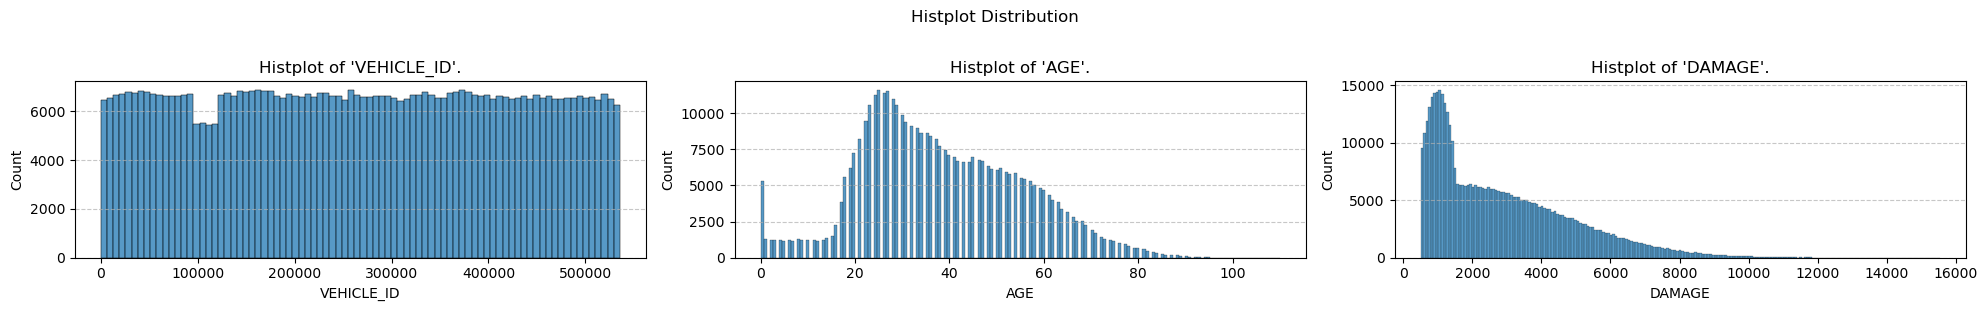

In [22]:
numerical_features_people = list(people.select_dtypes(include=['float64']).columns)

ncols = 3
nrows = -(-len(numerical_features_people) // ncols)  

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * ncols))

ax = np.atleast_2d(ax)

for i, column in enumerate(numerical_features_people):
    row = i // ncols
    col = i % ncols
    sns.histplot(data=people, x=column, multiple='dodge', ax=ax[row, col])
    ax[row, col].set_title(f"Histplot of '{column}'.")
    ax[row, col].grid(axis='y', linestyle='--', alpha=.7)

for i in range(len(numerical_features_people), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(ax[row, col])

plt.suptitle("Histplot Distribution", y=1.02)
plt.tight_layout()
plt.show()


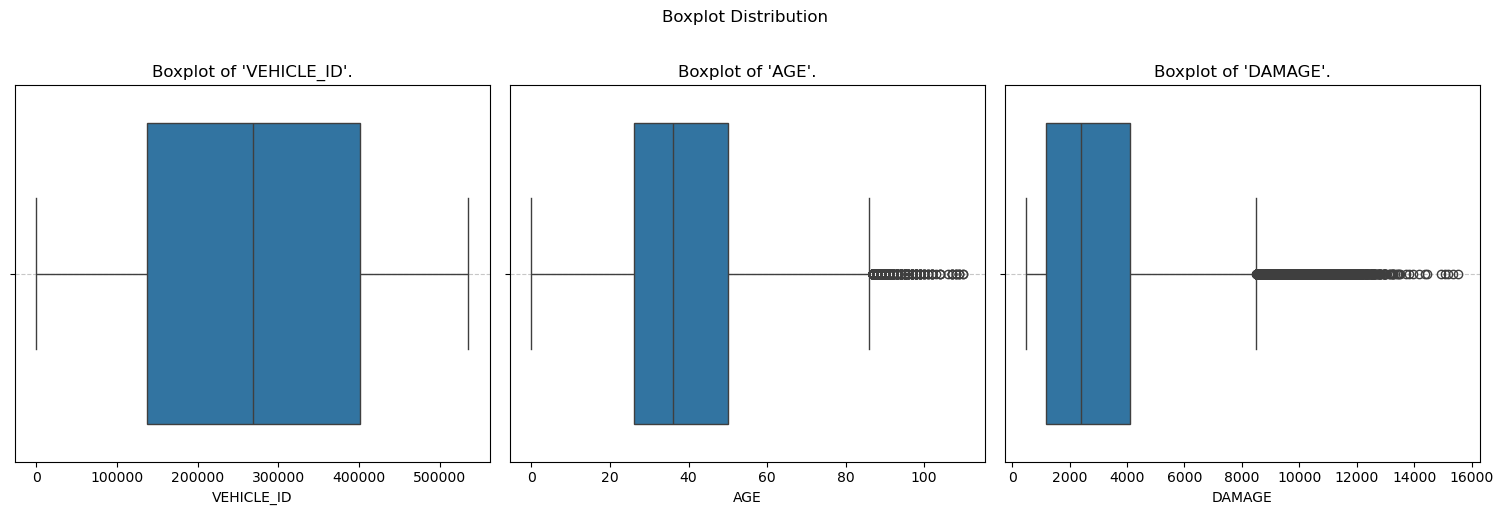

In [23]:
ncols = 3
nrows = -(-len(numerical_features_people) // ncols)  

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
ax = ax.reshape(nrows, ncols) 

ax = np.atleast_2d(ax)

for i, column in enumerate(numerical_features_people):
    row = i // ncols
    col = i % ncols
    sns.boxplot(x=people[column], ax=ax[row, col])
    ax[row, col].set_title(f"Boxplot of '{column}'.")
    ax[row, col].grid(axis='y', linestyle='--', alpha=.7)

for i in range(len(numerical_features_people), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(ax[row, col])

plt.suptitle("Boxplot Distribution", y=1.02)
plt.tight_layout()
plt.show()

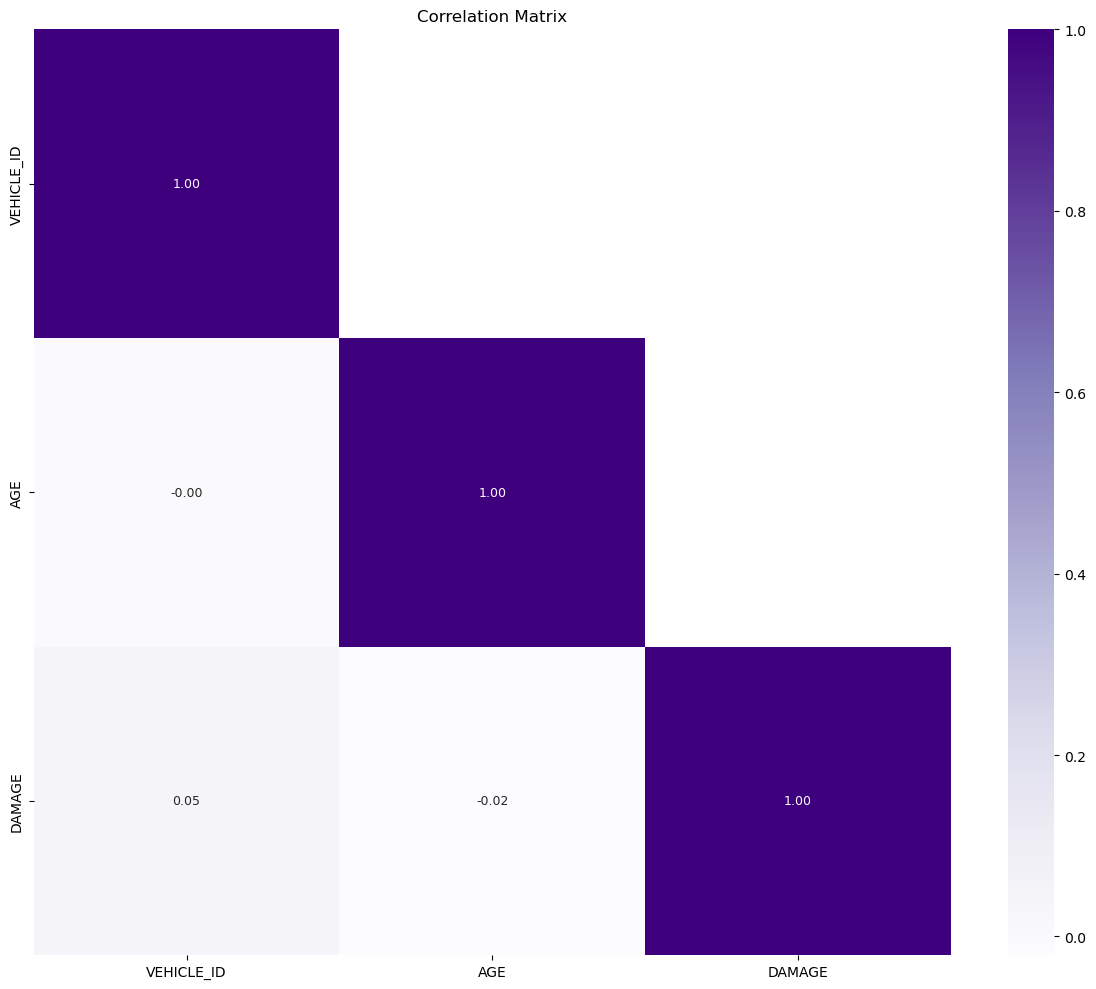

In [24]:
low_variance_features_people = [col for col in numerical_features_people if people[col].var() == 0]
if low_variance_features_people:
    print(f"Escluse per varianza nulla: {low_variance_features_people}")
    correlation_features_people = [col for col in numerical_features_people if col not in low_variance_features_people]
else:
    correlation_features_people = numerical_features_people
    
correlation_matrix_people = people[correlation_features_people].corr(method='pearson')

mask = np.triu(np.ones_like(correlation_matrix_people, dtype=bool), k=1)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_people, annot=True, cmap='Purples', fmt='.2f', mask=mask, annot_kws={'size': 9})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


### Vehicles

In [25]:
vehicles

,CRASH_UNIT_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
0,561555,JC113649,01/12/2019 12:01:00 AM,1,DRIVER,535742.0,UNKNOWN,UNKNOWN,XX,NaN,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,S,STRAIGHT AHEAD,1.0,REAR-RIGHT
1,561563,JC113627,01/11/2019 11:36:00 PM,2,DRIVER,535738.0,"TOYOTA MOTOR COMPANY, LTD.",Highlander(beginning vehicle year 2001),IL,2003.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,S,STRAIGHT AHEAD,1.0,FRONT-RIGHT
2,561564,JC113627,01/11/2019 11:36:00 PM,1,DRIVER,535741.0,FORD,EXPLORER,IL,2001.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,E,STRAIGHT AHEAD,1.0,FRONT-LEFT
3,561540,JC113637,01/11/2019 11:31:00 PM,1,DRIVER,535714.0,CHEVROLET,MALIBU (CHEVELLE),IL,2013.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,1.0,SIDE-LEFT
4,561541,JC113637,01/11/2019 11:31:00 PM,2,DRIVER,535718.0,JEEP,LAREDO,IL,2016.0,NONE,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,1.0,SIDE-LEFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460432,30751,HZ164689,02/24/2014 07:45:00 PM,2,DRIVER,29701.0,CHEVROLET,UNKNOWN,TN,2016.0,NONE,PASSENGER,PERSONAL,S,TURNING LEFT,1.0,REAR
460433,24495,HZ122950,01/21/2014 07:40:00 AM,1,DRIVER,23633.0,"TOYOTA MOTOR COMPANY, LTD.",COROLLA,IL,2005.0,NONE,PASSENGER,NOT IN USE,S,STRAIGHT AHEAD,1.0,SIDE-LEFT
460434,24496,HZ122950,01/21/2014 07:40:00 AM,2,DRIVER,23634.0,NISSAN,ROGUE,IL,2013.0,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT
460435,481321,JB442550,01/18/2014 06:14:00 PM,1,DRIVER,460655.0,MERCEDES-BENZ,UNKNOWN,IL,2016.0,UNKNOWN,PASSENGER,UNKNOWN/NA,E,LEAVING TRAFFIC LANE TO PARK,1.0,FRONT-RIGHT


In [26]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CRASH_UNIT_ID        460437 non-null  int64  
 1   RD_NO                460437 non-null  object 
 2   CRASH_DATE           460437 non-null  object 
 3   UNIT_NO              460437 non-null  int64  
 4   UNIT_TYPE            460436 non-null  object 
 5   VEHICLE_ID           450064 non-null  float64
 6   MAKE                 450064 non-null  object 
 7   MODEL                448651 non-null  object 
 8   LIC_PLATE_STATE      410808 non-null  object 
 9   VEHICLE_YEAR         371782 non-null  float64
 10  VEHICLE_DEFECT       450064 non-null  object 
 11  VEHICLE_TYPE         450064 non-null  object 
 12  VEHICLE_USE          450064 non-null  object 
 13  TRAVEL_DIRECTION     450064 non-null  object 
 14  MANEUVER             450064 non-null  object 
 15  OCCUPANT_CNT     

In [27]:
vehicles.describe()

,CRASH_UNIT_ID,UNIT_NO,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT
count,460437.000000,460437.000000,450064.000000,371782.000000,450064.000000
mean,276789.302660,1.466683,266361.515958,2014.637855,1.243228
std,162364.095967,0.554394,154731.389043,202.437329,0.726653
min,2.000000,0.000000,2.000000,1900.000000,0.000000
25%,135276.000000,1.000000,133665.750000,2005.000000,1.000000
50%,274966.000000,1.000000,266065.000000,2011.000000,1.000000
75%,416914.000000,2.000000,399717.250000,2014.000000,1.000000
max,566693.000000,10.000000,535742.000000,9999.000000,60.000000


In [28]:
missing_vehicles = vehicles.isnull().mean() * 100
missing_vehicles

CRASH_UNIT_ID           0.000000
RD_NO                   0.000000
CRASH_DATE              0.000000
UNIT_NO                 0.000000
UNIT_TYPE               0.000217
VEHICLE_ID              2.252860
MAKE                    2.252860
MODEL                   2.559742
LIC_PLATE_STATE        10.778673
VEHICLE_YEAR           19.254534
VEHICLE_DEFECT          2.252860
VEHICLE_TYPE            2.252860
VEHICLE_USE             2.252860
TRAVEL_DIRECTION        2.252860
MANEUVER                2.252860
OCCUPANT_CNT            2.252860
FIRST_CONTACT_POINT     2.256118
dtype: float64

In [29]:
for column_name, values in vehicles.items(): 
    for value in values: 
        if isinstance(value, str) and re.search(r'[,;]', value): 
            print(f"Colonna '{column_name}', valore: '{value}'")
            break

Colonna 'MAKE', valore: 'TOYOTA MOTOR COMPANY, LTD.'
Colonna 'MODEL', valore: 'FORD-TRUCK,VAN,SUV, ETC'


In [30]:
for column_name, values in vehicles.items(): 
    for value in values: 
        if isinstance(value, str) and re.search(r'[\(]', value): 
            print(f"Colonna '{column_name}', valore: '{value}'")
            break

Colonna 'MAKE', valore: 'ACURA (DIV. OF AMERICAN HONDA MOTOR CO.)'
Colonna 'MODEL', valore: 'Highlander(beginning vehicle year 2001)'
Colonna 'VEHICLE_TYPE', valore: 'SPORT UTILITY VEHICLE (SUV)'
Colonna 'FIRST_CONTACT_POINT', valore: 'TOTAL (ALL AREAS)'


In [31]:
duplicated_vehicles = vehicles.duplicated().sum()
duplicated_vehicles

0

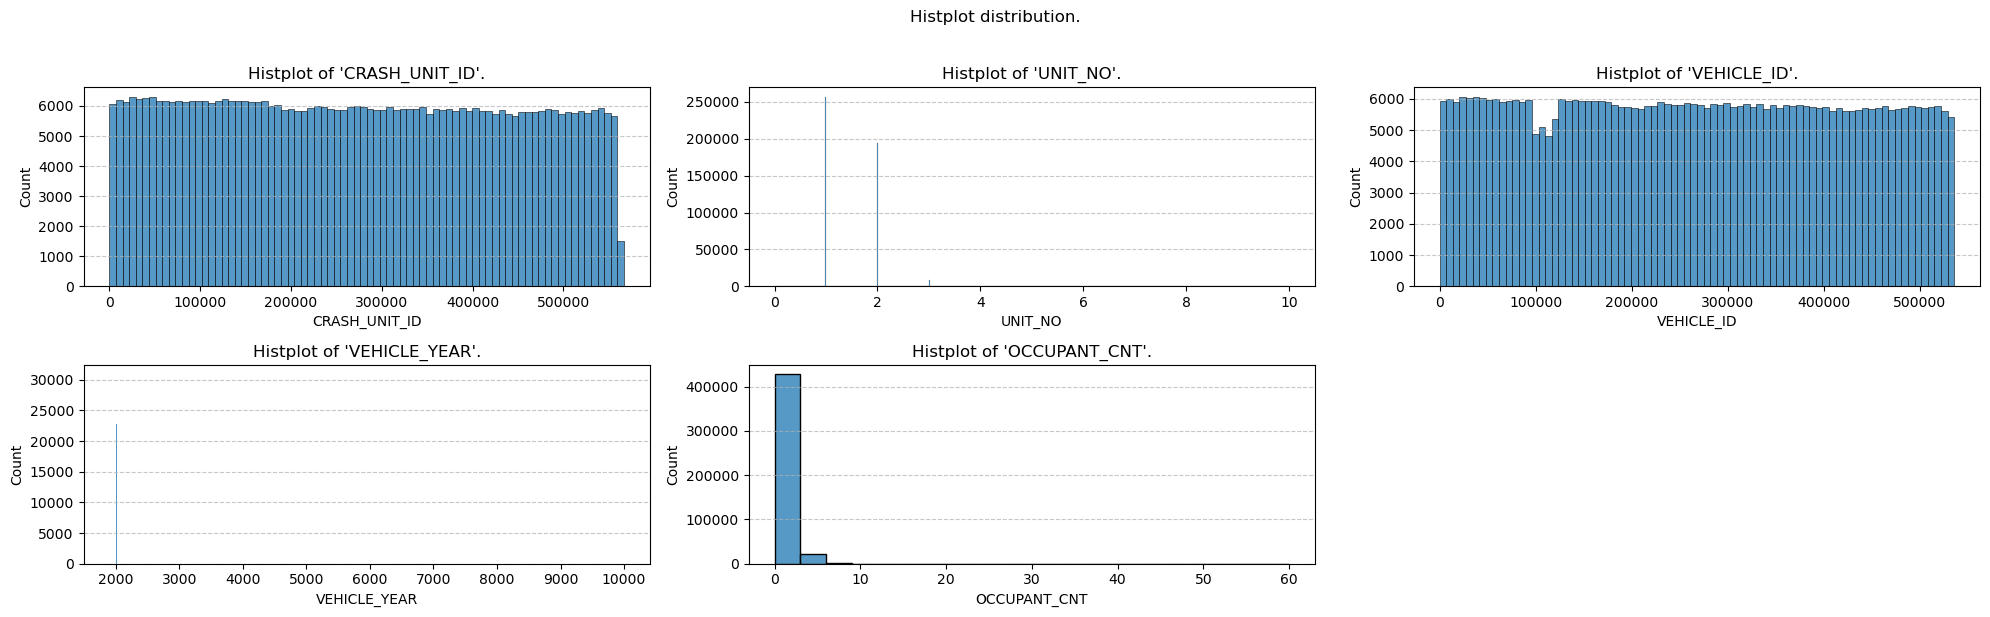

In [32]:
numerical_features_vehicles = list(vehicles.select_dtypes(include=['int64', 'float64']).columns)

ncols = 3
nrows = -(-len(numerical_features_vehicles) // ncols)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows*ncols))

for i, column in enumerate(numerical_features_vehicles):
    row = i // ncols
    col = i % ncols
    sns.histplot(data=vehicles, x=column, multiple='dodge', ax=ax[row, col])
    ax[row, col].set_title(f"Histplot of '{column}'.")
    ax[row, col].grid(axis='y', linestyle='--', alpha=.7)

for i in range(len(numerical_features_vehicles), nrows*ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(ax[row, col])

plt.suptitle("Histplot distribution.", y=1.02)
plt.tight_layout()
plt.show()

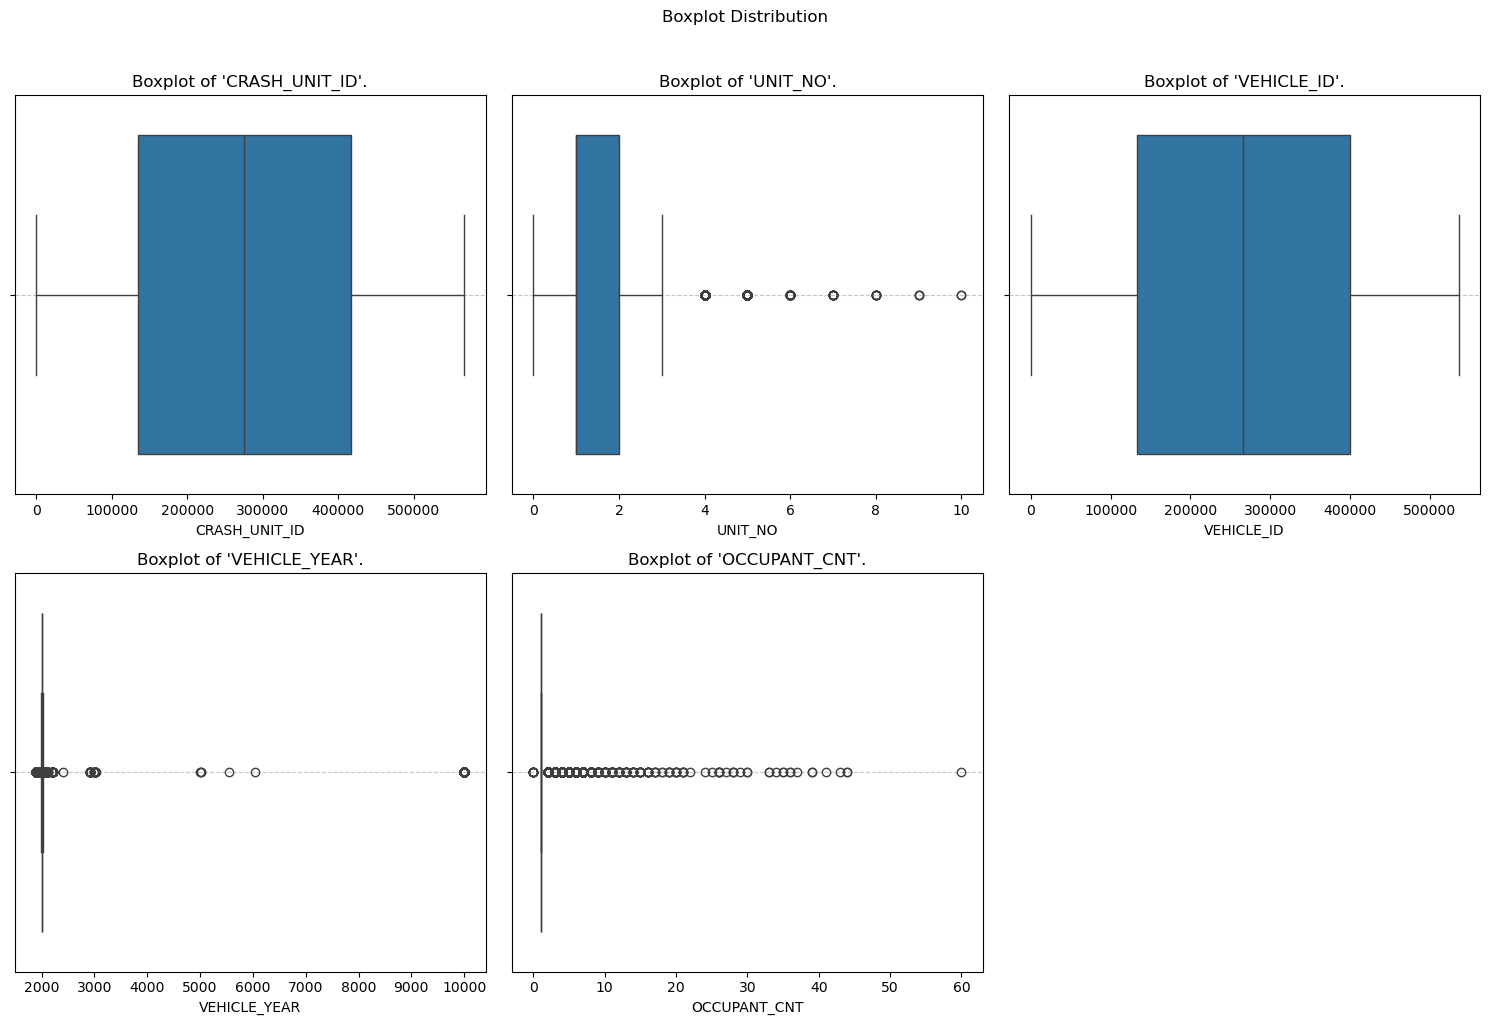

In [33]:
ncols = 3
nrows = -(-len(numerical_features_vehicles) // ncols)  

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
ax = ax.reshape(nrows, ncols) 

for i, column in enumerate(numerical_features_vehicles):
    row = i // ncols
    col = i % ncols
    sns.boxplot(x=vehicles[column], ax=ax[row, col])
    ax[row, col].set_title(f"Boxplot of '{column}'.")
    ax[row, col].grid(axis='y', linestyle='--', alpha=.7)

for i in range(len(numerical_features_vehicles), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(ax[row, col])

plt.suptitle("Boxplot Distribution", y=1.02)
plt.tight_layout()
plt.show()

In [42]:
print(vehicles["VEHICLE_YEAR"].unique())

[  nan 2003. 2001. 2013. 2016. 2015. 2007. 2002. 2011. 2010. 2014. 2017.
 1999. 2006. 2004. 2012. 2008. 2009. 2000. 2018. 1997. 2005. 1995. 1998.
 2020. 2103. 1991. 2019. 1996. 1993. 1992. 1994. 1990. 9999. 1989. 1984.
 2204. 2915. 1986. 1900. 2913. 1988. 1987. 2205. 3007. 1982. 2107. 2041.
 2999. 2917. 1976. 2105. 2201. 1973. 2104. 2918. 1983. 1981. 1985. 2911.
 2916. 1980. 2099. 2208. 1979. 3017. 2033. 2207. 1978. 1901. 1970. 1969.
 2028. 1977. 2022. 2096. 1971. 2206. 1968. 1967. 1941. 2102. 1975. 2055.
 1972. 2108. 3013. 1952. 5007. 1965. 3003. 2106. 2202. 1966. 2027. 2088.
 1960. 2998. 3016. 2023. 3023. 2040. 1911. 2114. 2994. 2203. 2914. 2402.
 2100. 2912. 2101. 1905. 1974. 2045. 1964. 1951. 5015. 2910. 2222. 2113.
 1961. 2112. 2021. 2992. 3004. 5555. 2110. 5012. 3012. 2117. 6043. 1962.]


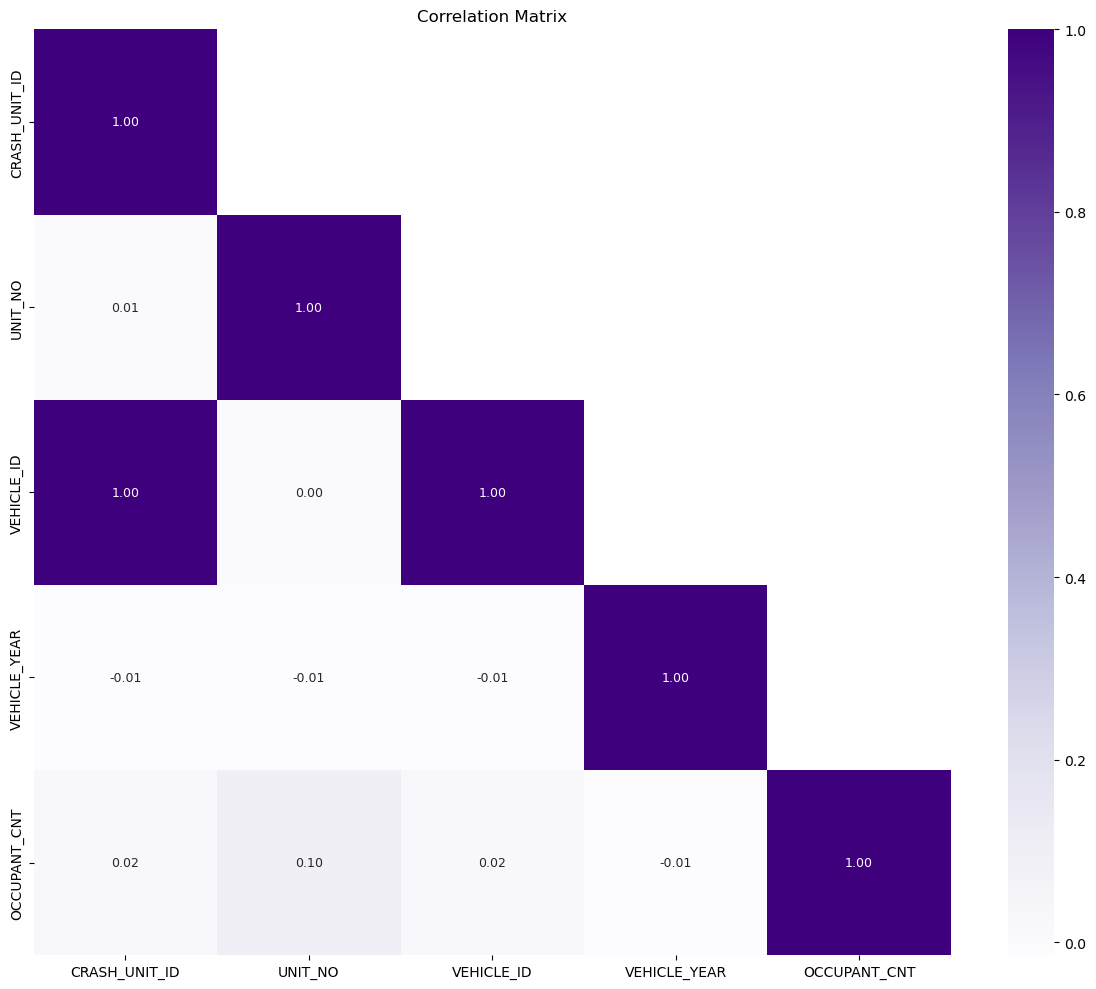

In [34]:
low_variance_features_vehicles = [col for col in numerical_features_vehicles if vehicles[col].var() == 0]
if low_variance_features_vehicles:
    print(f"Escluse per varianza nulla: {low_variance_features_vehicles}")
    correlation_features_vehicles = [col for col in numerical_features_vehicles if col not in low_variance_features_vehicles]
else:
    correlation_features_vehicles = numerical_features_vehicles
    
correlation_matrix_vehicles = vehicles[correlation_features_vehicles].corr(method='pearson')

mask = np.triu(np.ones_like(correlation_matrix_vehicles, dtype=bool), k=1)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_vehicles, annot=True, cmap='Purples', fmt='.2f', mask=mask, annot_kws={'size': 9})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


### Merged

In [35]:
merged = crashes.merge(people, on='RD_NO', how='outer').merge(vehicles, on='RD_NO', how='outer')

In [36]:
merged

,RD_NO,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,PERSON_ID,PERSON_TYPE,VEHICLE_ID_x,CRASH_DATE_y,CITY,STATE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,DAMAGE_CATEGORY,DAMAGE,CRASH_UNIT_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID_y,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
0,AJ101349,01/02/2017 09:13:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,01/02/2017 10:15:00 AM,IMPROPER LANE USAGE,NOT APPLICABLE,450,E,35TH ST,211.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9,2,1,41.831296,-87.614926,POINT (-87.614925683354 41.831296076845),O113556,DRIVER,112611.0,01/02/2017 09:13:00 AM,BOLINGBROOK,IL,F,NaN,NONE PRESENT,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IMPROPER LANE CHANGE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"$501 - $1,500",1362.085002,113556,01/02/2017 09:13:00 AM,1,DRIVER,112611.0,DODGE,CARAVAN,IL,2013.0,NONE,PASSENGER,PERSONAL,E,CHANGING LANES,1.0,FRONT-LEFT
1,AJ101349,01/02/2017 09:13:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,01/02/2017 10:15:00 AM,IMPROPER LANE USAGE,NOT APPLICABLE,450,E,35TH ST,211.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9,2,1,41.831296,-87.614926,POINT (-87.614925683354 41.831296076845),O113556,DRIVER,112611.0,01/02/2017 09:13:00 AM,BOLINGBROOK,IL,F,NaN,NONE PRESENT,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IMPROPER LANE CHANGE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"$501 - $1,500",1362.085002,113557,01/02/2017 09:13:00 AM,2,DRIVER,112602.0,NISSAN,Pathfinder,IL,2016.0,NONE,PASSENGER,PERSONAL,NE,STRAIGHT AHEAD,1.0,REAR-RIGHT
2,AJ101349,01/02/2017 09:13:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,01/02/2017 10:15:00 AM,IMPROPER LANE USAGE,NOT APPLICABLE,450,E,35TH ST,211.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9,2,1,41.831296,-87.614926,POINT (-87.614925683354 41.831296076845),O113557,DRIVER,112602.0,01/02/2017 09:13:00 AM,CHICAGO,IL,F,37.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"$501 - $1,500",1300.672268,113556,01/02/2017 09:13:00 AM,1,DRIVER,112611.0,DODGE,CARAVAN,IL,2013.0,NONE,PASSENGER,PERSONAL,E,CHANGING LANES,1.0,FRONT-LEFT
3,AJ101349,01/02/2017 09:13:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,01/02/2017 10:15:00 AM,IMPROPER LANE USAGE,NOT APPLICABLE,450,E,35TH ST,211.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9,2,1,41.831296,-87.614926,POINT (-87.614925683354 41.831296076845),O113557,DRIVER,112602.0,01/02/2017 09:13:00 AM,CHICAGO,IL,F,37.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,"$501 - $1,500",1300.672268,113557,01/02/2017 09:13:00 AM,2,DRIVER,112602.0,NISSAN,Pathfinder,IL,2016.0,NONE,PASSENGER,PERSONAL,NE,STRAIGHT AHEAD,1.0,REAR-RIGHT
4,AJ103671,01/04/2017 08:45:00 AM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAY

In [37]:
merged.describe()

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,VEHICLE_ID_x,AGE,DAMAGE,CRASH_UNIT_ID,UNIT_NO,VEHICLE_ID_y,VEHICLE_YEAR,OCCUPANT_CNT
count,1.096979e+06,1.096979e+06,1.096961e+06,1.096979e+06,1.096979e+06,1.096979e+06,1.096979e+06,1.096979e+06,1.096979e+06,1.096979e+06,1096979.0,1.096979e+06,1.096979e+06,1.096979e+06,1.092249e+06,1.092249e+06,1.074172e+06,808081.000000,955587.000000,1.096979e+06,1.096979e+06,1.072573e+06,921280.000000,1.072573e+06
mean,2.953649e+01,3.496568e+03,1.233496e+03,2.135971e+00,2.577041e-01,1.264382e-03,2.732778e-02,1.352414e-01,9.387053e-02,2.743381e+00,0.0,1.350583e+01,4.147679e+00,7.107315e+00,4.186063e+01,-8.767693e+01,2.686256e+05,37.983009,2912.072386,2.790247e+05,1.533280e+00,2.685637e+05,2013.216212,1.479391e+00
std,3.935974e+00,2.919015e+03,7.102881e+02,5.217791e-01,7.624069e-01,4.067886e-02,2.126316e-01,5.388984e-01,4.422719e-01,2.158604e+00,0.0,5.216680e+00,1.963005e+00,3.444939e+00,8.356599e-02,5.740918e-02,1.541617e+05,17.065488,2013.952211,1.617971e+05,6.102587e-01,1.541692e+05,170.997282,1.477210e+00
min,2.000000e+01,0.000000e+00,1.110000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,1.000000e+00,4.164467e+01,-8.792504e+01,2.000000e+00,0.000000,501.002402,2.000000e+00,0.000000e+00,2.000000e+00,1900.000000,0.000000e+00
25%,3.000000e+01,1.080000e+03,7.110000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0,1.000000e+01,2.000000e+00,4.000000e+00,4.178810e+01,-8.771983e+01,1.376890e+05,26.000000,1210.839463,1.393870e+05,1.000000e+00,1.376090e+05,2005.000000,1.000000e+00
50%,3.000000e+01,3.000000e+03,1.214000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0,1.400000e+01,4.000000e+00,8.000000e+00,4.187798e+01,-8.767015e+01,2.690430e+05,36.000000,2430.556667,2.779740e+05,1.000000e+00,2.689670e+05,2011.000000,1.000000e+00
75%,3.000000e+01,5.500000e+03,1.824000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.0,1.700000e+01,6.000000e+00,1.000000e+01,4.192376e+01,-8.763193e+01,4.011312e+05,50.000000,4144.235723,4.182715e+05,2.000000e+00,4.010590e+05,2014.000000,2.000000e+00
max,7.000000e+01,4.511000e+05,2.535000e+03,1.800000e+01,2.100000e+01,3.000000e+00,7.000000e+00,2.100000e+01,1.000000e+01,6.100000e+01,0.0,2.300000e+01,7.000000e+00,1.200000e+01,4.202278e+01,-8.752459e+01,5.357420e+05,110.000000,15536.847301,5.666930e+05,1.000000e+01,5.357420e+05,9999.000000,6.000000e+01


In [38]:
missing_merged = merged.isnull().mean() * 100
missing_merged

RD_NO                     0.000000
CRASH_DATE_x              0.000000
POSTED_SPEED_LIMIT        0.000000
TRAFFIC_CONTROL_DEVICE    0.000000
DEVICE_CONDITION          0.000000
                            ...   
VEHICLE_USE               2.224837
TRAVEL_DIRECTION          2.224837
MANEUVER                  2.224837
OCCUPANT_CNT              2.224837
FIRST_CONTACT_POINT       2.229031
Length: 70, dtype: float64

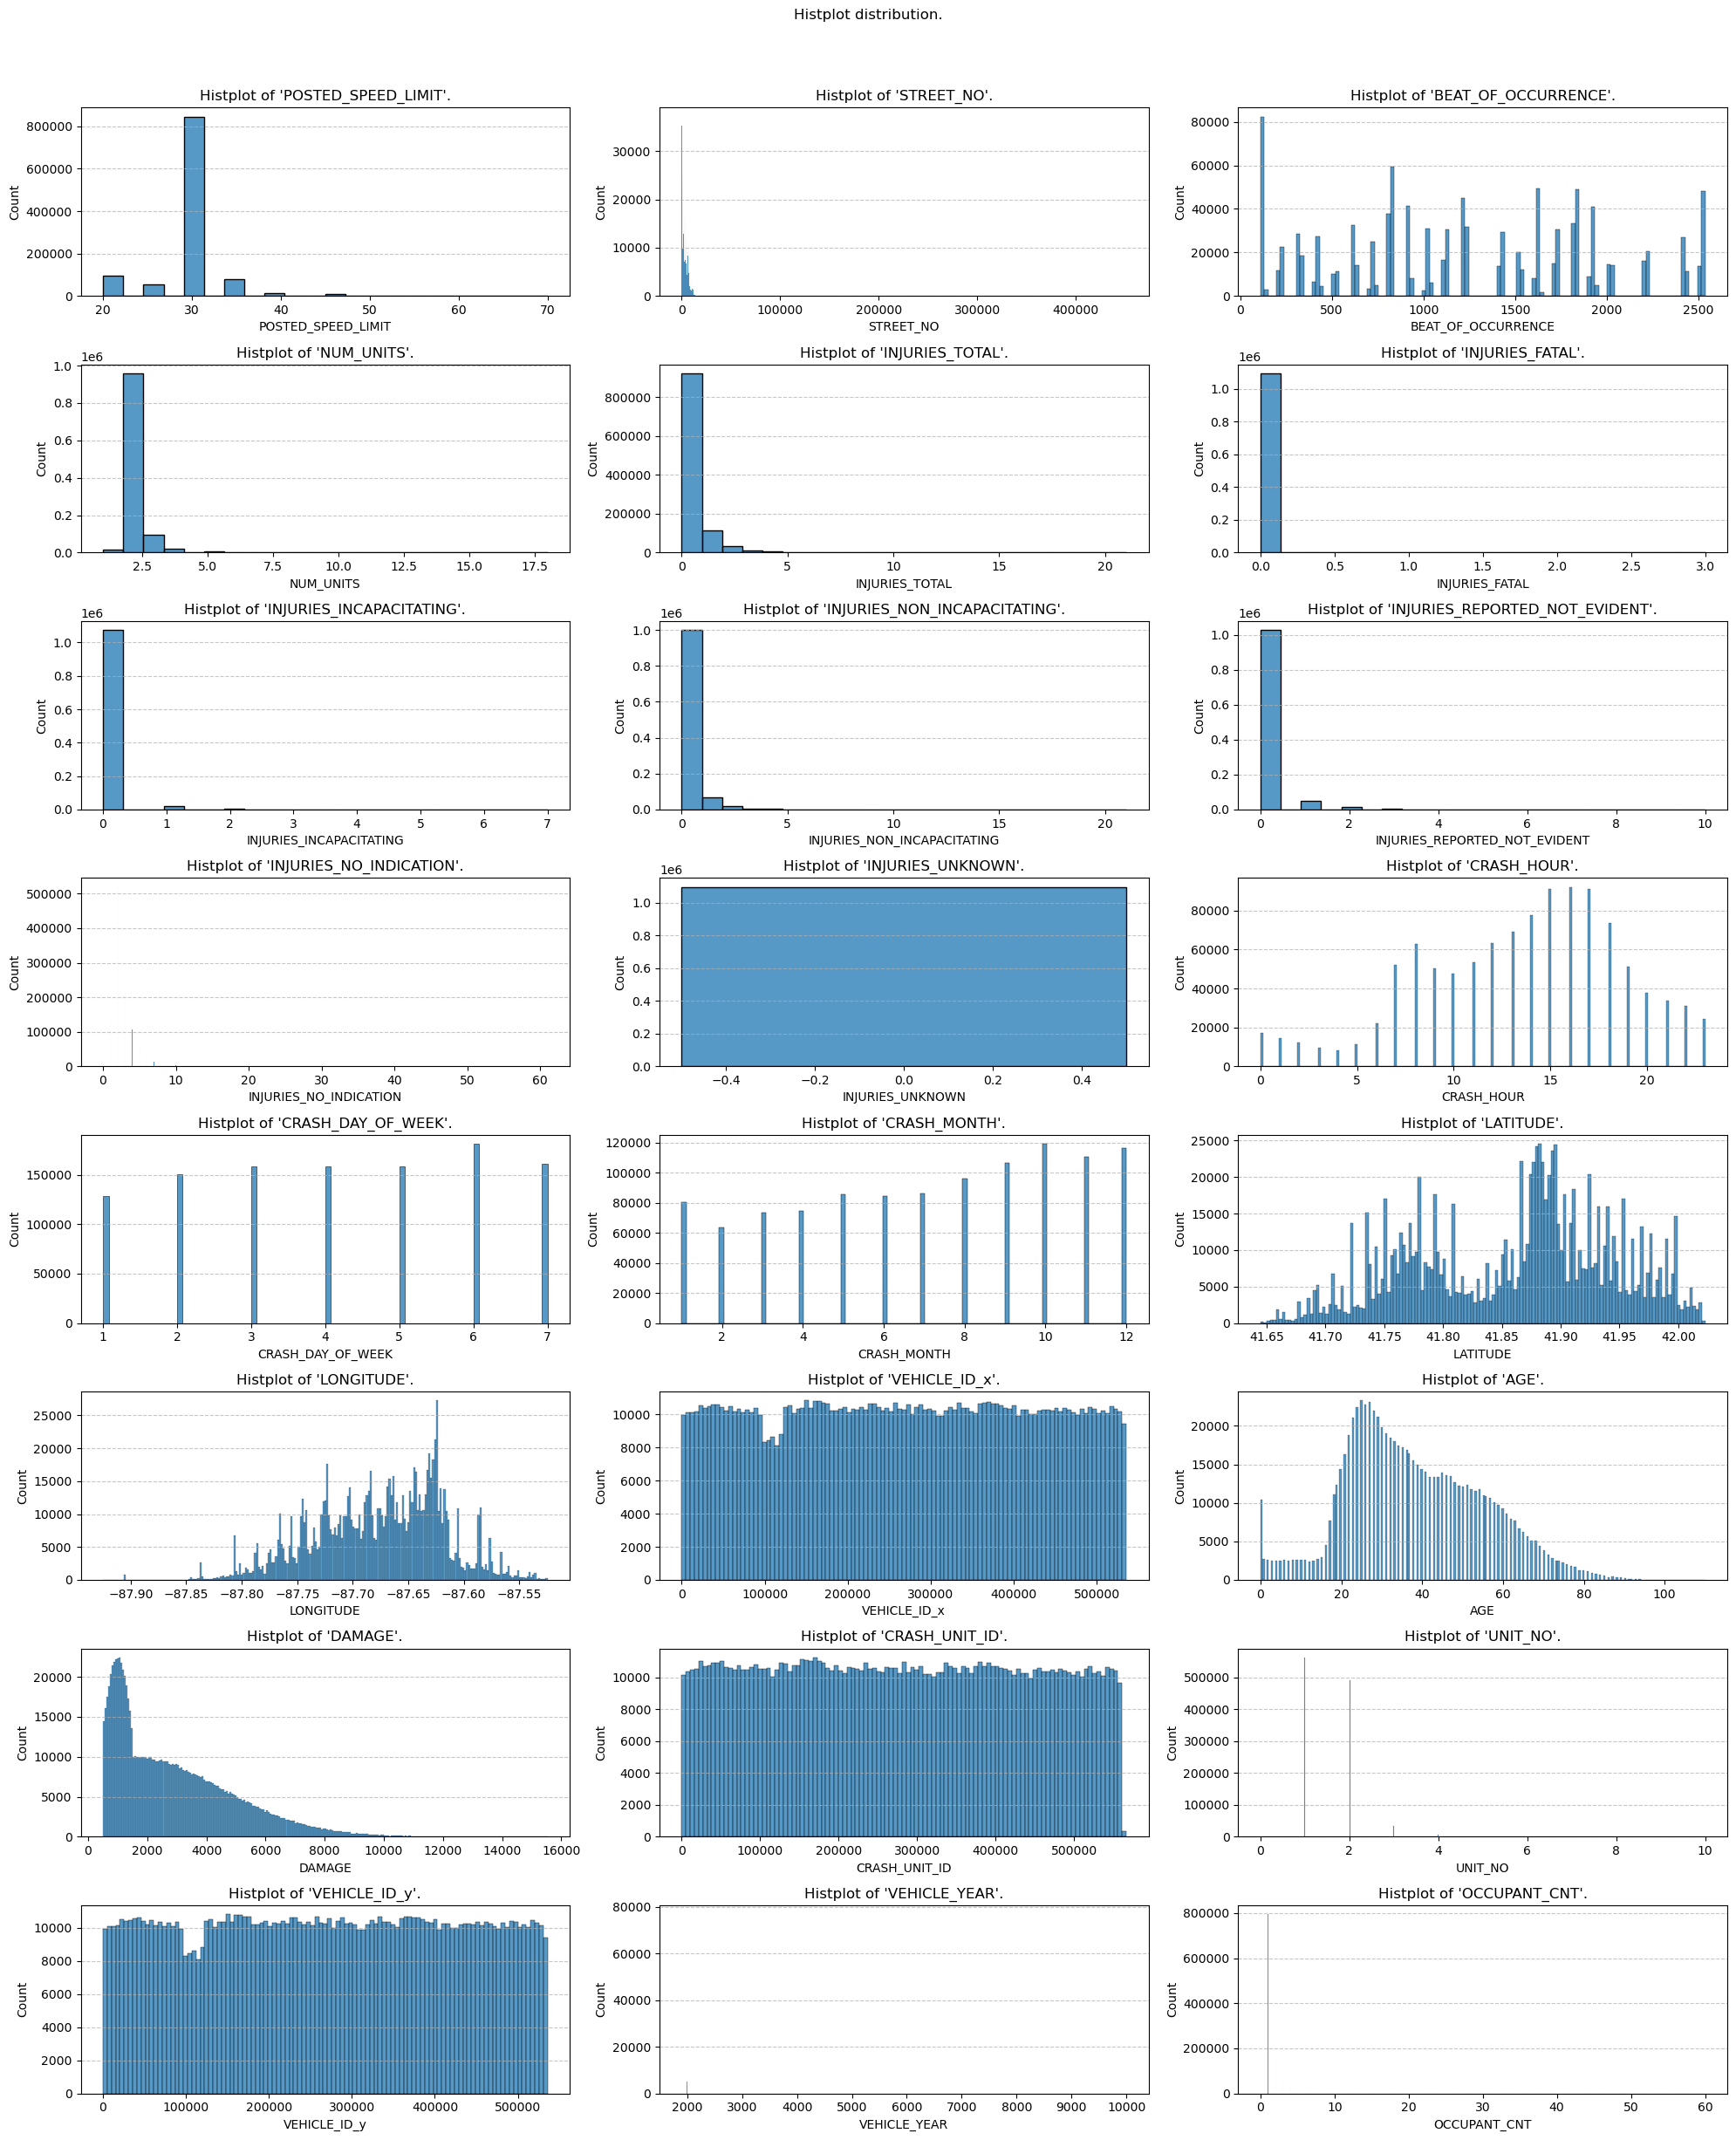

In [39]:
numerical_features_merged = list(merged.select_dtypes(include=['int64', 'float64']).columns)

ncols = 3
nrows = -(-len(numerical_features_merged) // ncols)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows*ncols))

for i, column in enumerate(numerical_features_merged):
    row = i // ncols
    col = i % ncols
    sns.histplot(data=merged, x=column, multiple='dodge', ax=ax[row, col])
    ax[row, col].set_title(f"Histplot of '{column}'.")
    ax[row, col].grid(axis='y', linestyle='--', alpha=.7)

for i in range(len(numerical_features_merged), nrows*ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(ax[row, col])

plt.suptitle("Histplot distribution.", y=1.02)
plt.tight_layout()
plt.show()

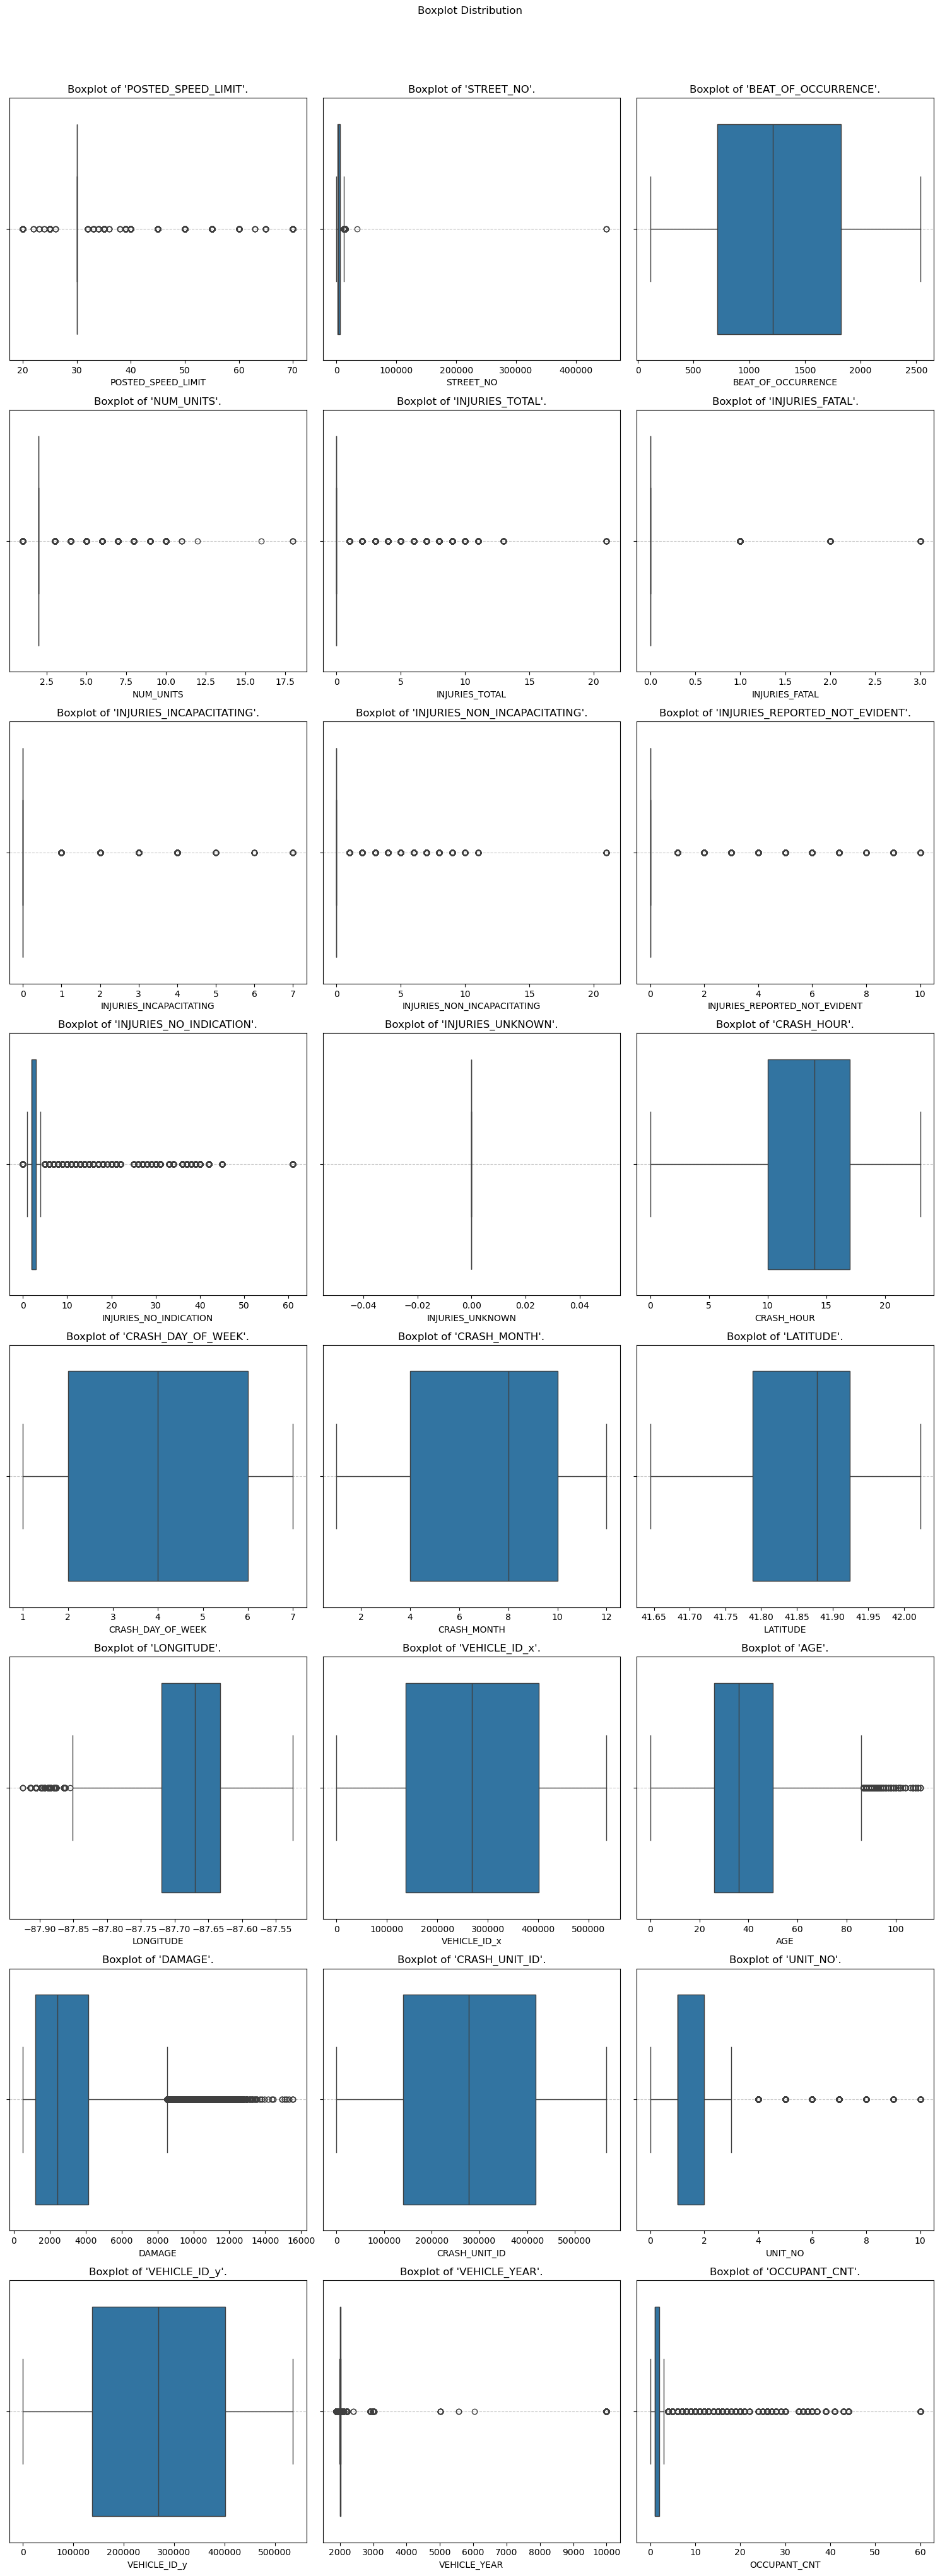

In [40]:
ncols = 3
nrows = -(-len(numerical_features_merged) // ncols)  

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
ax = ax.reshape(nrows, ncols) 

for i, column in enumerate(numerical_features_merged):
    row = i // ncols
    col = i % ncols
    sns.boxplot(x=merged[column], ax=ax[row, col])
    ax[row, col].set_title(f"Boxplot of '{column}'.")
    ax[row, col].grid(axis='y', linestyle='--', alpha=.7)

for i in range(len(numerical_features_merged), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(ax[row, col])

plt.suptitle("Boxplot Distribution", y=1.02)
plt.tight_layout()
plt.show()

Escluse per varianza nulla: ['INJURIES_UNKNOWN']


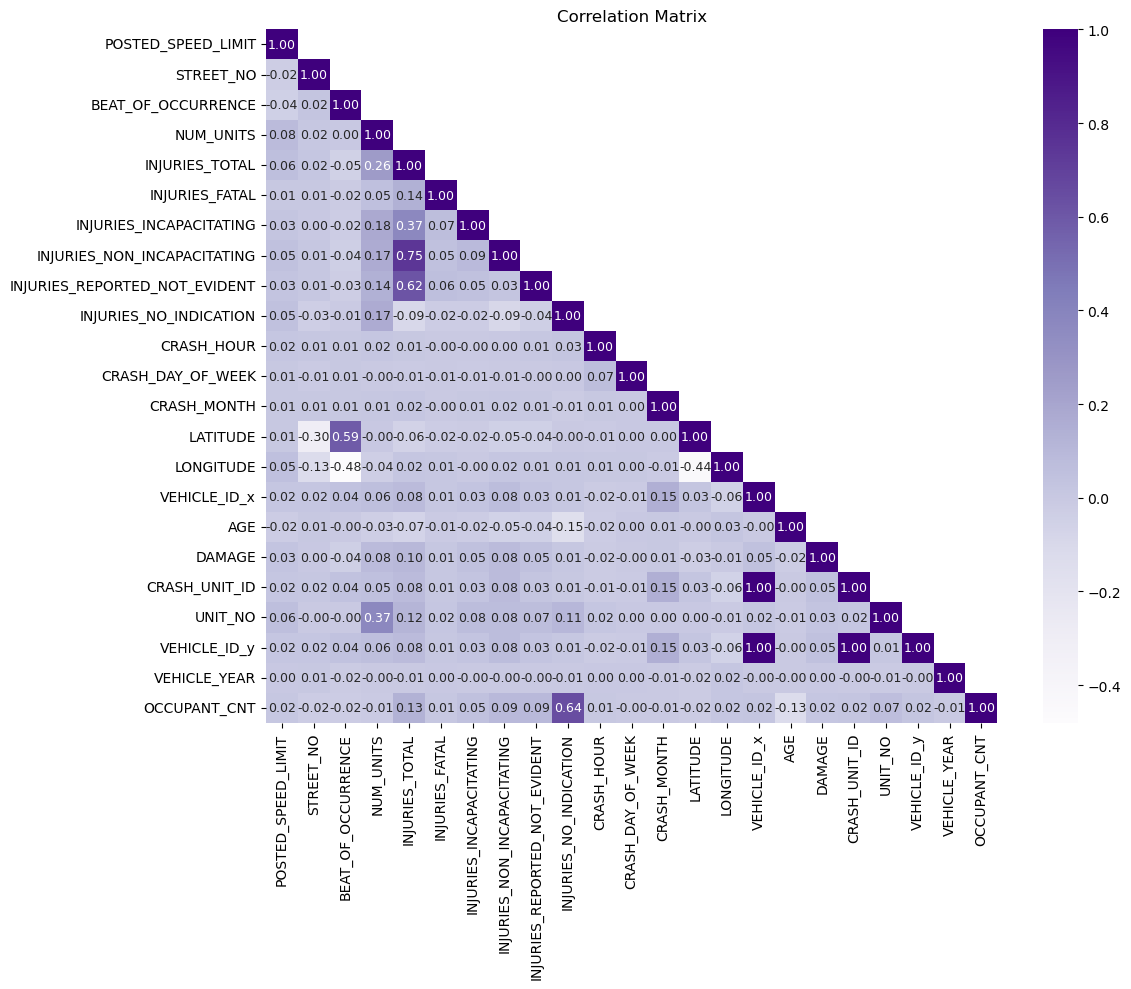

In [41]:
low_variance_features_merged = [col for col in numerical_features_merged if merged[col].var() == 0]
if low_variance_features_merged:
    print(f"Escluse per varianza nulla: {low_variance_features_merged}")
    correlation_features_merged = [col for col in numerical_features_merged if col not in low_variance_features_merged]

correlation_matrix_merged = merged[correlation_features_merged].corr(method='pearson')

mask = np.triu(np.ones_like(correlation_matrix_merged, dtype=bool), k=1)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_merged, annot=True, cmap='Purples', fmt='.2f', mask=mask, annot_kws={'size': 9})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
